In [65]:
import os

import numpy as np 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [86]:
import pandas as pd

# Base Data Paths
image_dir = "../data/raw/images/"
metadata_path = "../data/raw/metadata.csv"

In [67]:
# Loads in metadata
md = pd.read_csv(metadata_path)

# Glance at the firt 10 rows
md.head(10)

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
5,4,5.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 30, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive diffuse interstitial opacities and...,NaN,NaN
6,5,NaN,NaN,NaN,ARDS,NaN,Y,Y,NaN,NaN,...,2017,NaN,images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in...,NaN,NaN
7,6,0.0,NaN,NaN,COVID-19,NaN,Y,Y,Y,NaN,...,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
8,6,4.0,NaN,NaN,COVID-19,NaN,Y,Y,Y,NaN,...,"January 10, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2b.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
9,3,4.0,M,74.0,SARS,N,NaN,NaN,NaN,NaN,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN


In [68]:
# Structure Overview
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               372 non-null    int64  
 1   offset                  276 non-null    float64
 2   sex                     329 non-null    object 
 3   age                     318 non-null    float64
 4   finding                 372 non-null    object 
 5   survival                116 non-null    object 
 6   intubated               72 non-null     object 
 7   intubation_present      77 non-null     object 
 8   went_icu                35 non-null     object 
 9   in_icu                  7 non-null      object 
 10  needed_supplemental_O2  12 non-null     object 
 11  extubated               23 non-null     object 
 12  temperature             35 non-null     float64
 13  pO2_saturation          44 non-null     float64
 14  leukocyte_count         11 non-null     fl

Text(0.5, 1.0, 'Total Missing Values')

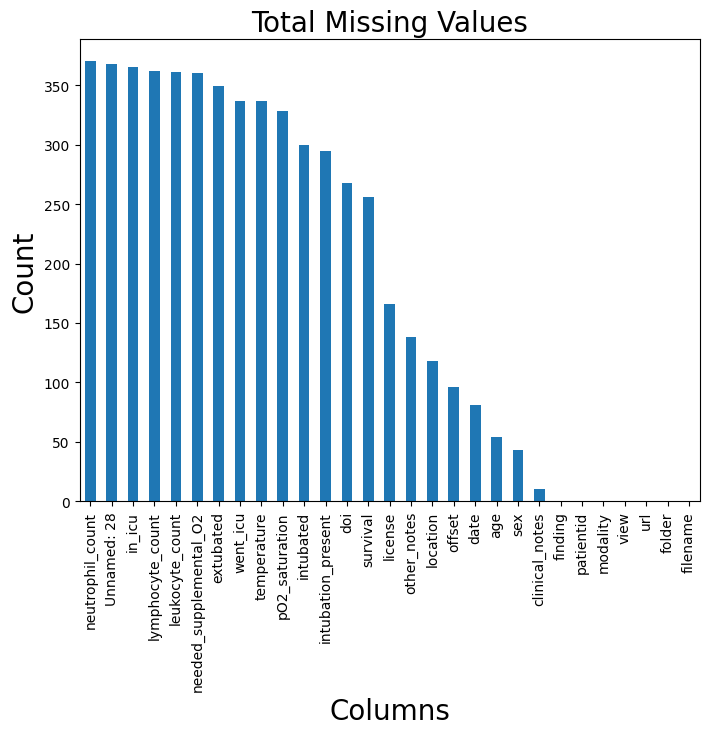

In [80]:
import matplotlib.pylab as plt
%matplotlib inline

# Visualize missing data
total = md.isnull().sum().sort_values(ascending=False)
total_select = total.head(29)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

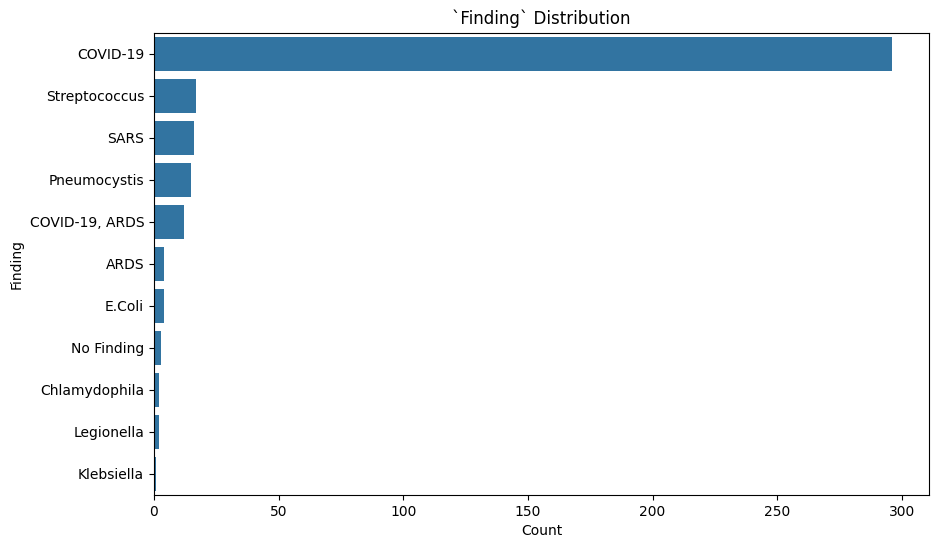

In [81]:
import seaborn as sns

# visualizing the target class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=md, y='finding', order=md['finding'].value_counts().index)
plt.title("`Finding` Distribution")
plt.xlabel("Count")
plt.ylabel("Finding")
plt.show()

In [ ]:
# Clean Metadata

## Images

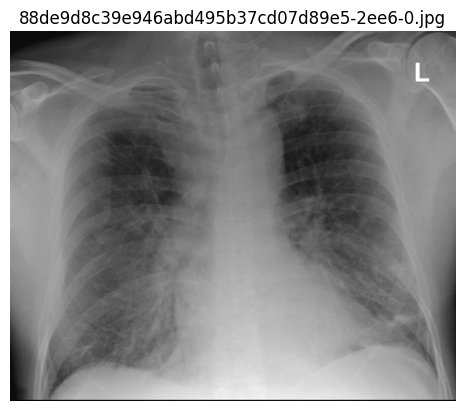

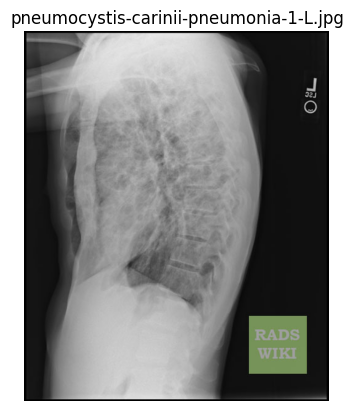

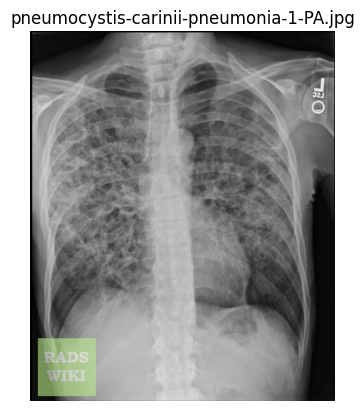

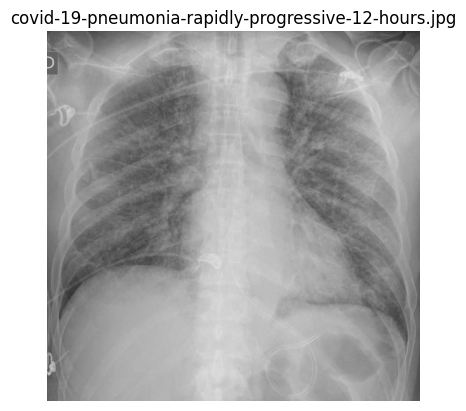

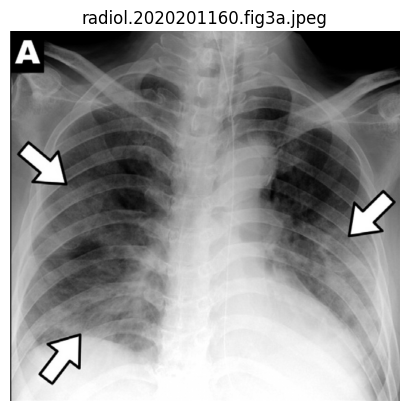

In [82]:
from PIL import Image

# Sample a few images
samples = md['filename'].dropna().sample(n=5, random_state=48)

for file in samples:
    img_path = os.path.join(image_dir, file)
    
    if os.path.exists(img_path):
        img = Image.open(img_path)
        # plt.figure(figsize=(3,2))
        plt.imshow(img, cmap='gray')
        plt.title(file)
        plt.axis('off')
        plt.show()


In [112]:
# Ensure that the files exist
filenames = md['filename']
no_existence = []

for filename in filenames:
    file_path = os.path.join(image_dir, filename)
    
    if not os.path.exists(file_path):
        no_existence.append(filename)

print(f"Files that don't exist: {len(no_existence)}")

Files that don't exist: 21


In [76]:
# Check for any duplicate files
duplicates = md[md.duplicated('filename')]
print(f"Duplicates: {len(duplicates)}")

Duplicates: 0
